# 결정 트리와 랜덤 포레스트

In [1]:
from preamble import *

## 결정트리
+ 장점 : 전처리에 민감하지 않음
+ 단점 : 과대적합에 취약

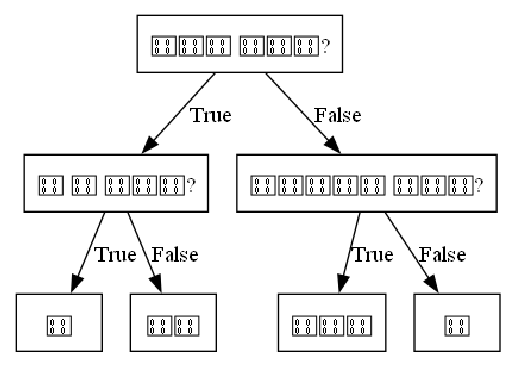

In [2]:
# TODO: 한국어 깨짐
# 결정트리 예제
# 결정트리 과정을 시각적으로 보여줌
mglearn.plots.plot_animal_tree()

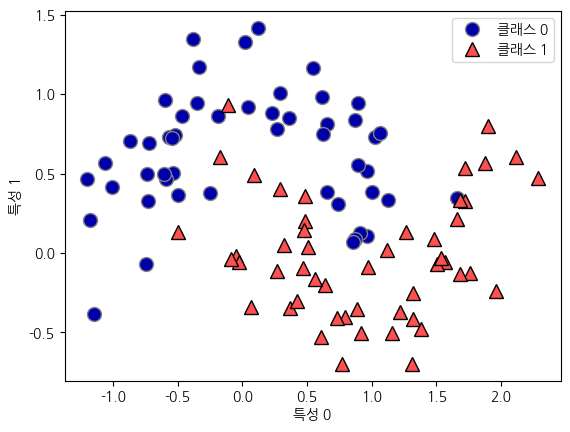

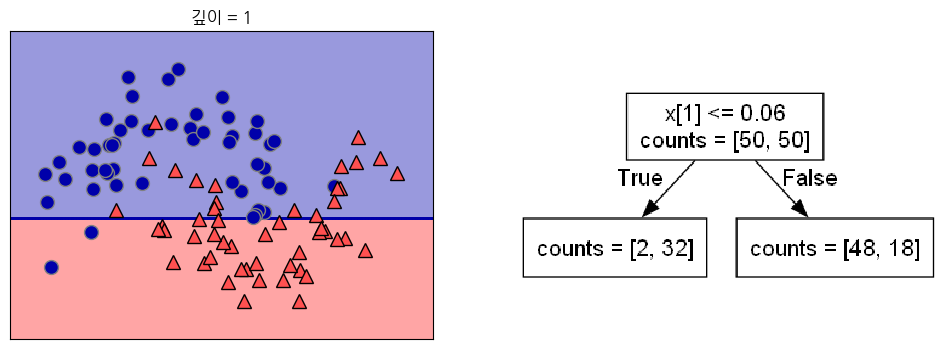

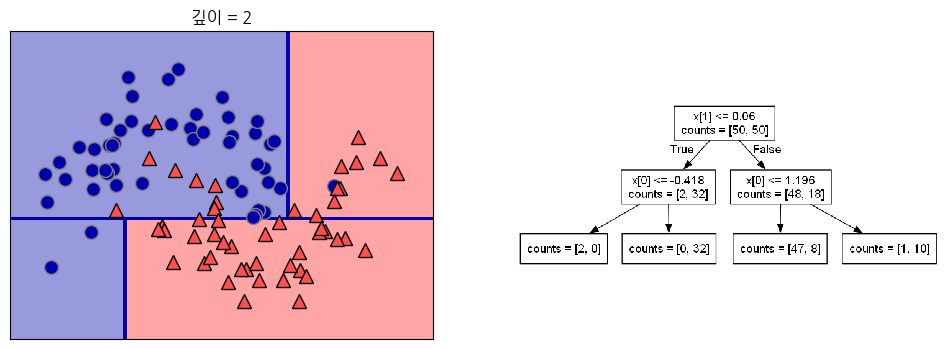

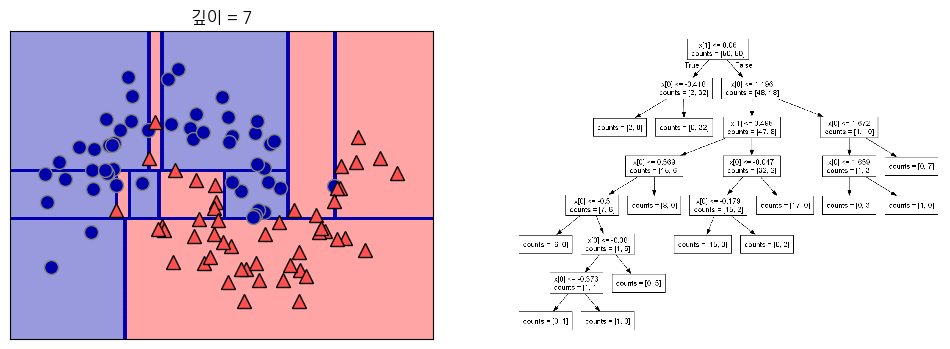

In [3]:
mglearn.plots.plot_tree_progressive()

### 일반적인 결정트리 학습

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 균질하지 않은 데이터를 층으로 나눠줌
                                                    random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file="DecisionTree.dot",
                class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

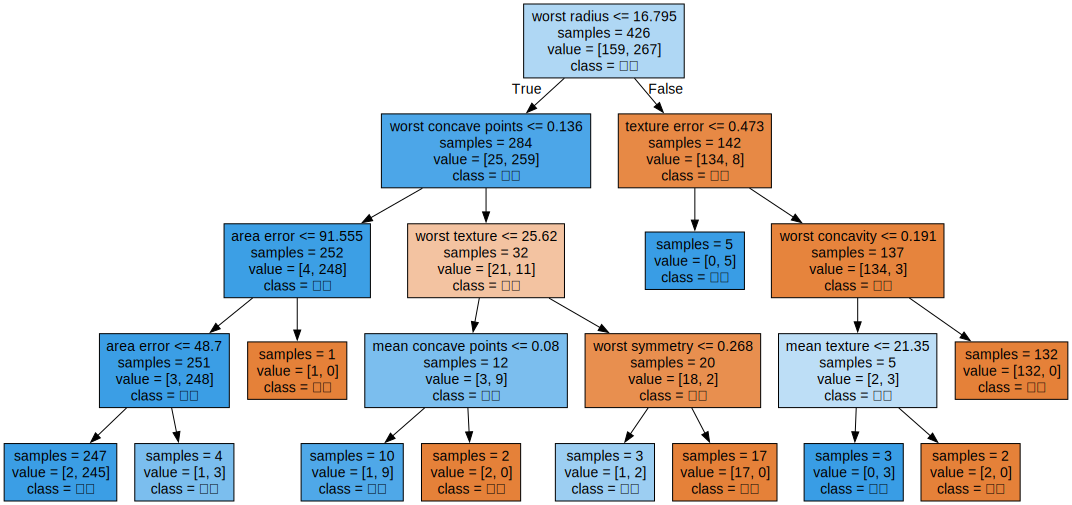

In [8]:
import graphviz
with open("DecisionTree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 특성 중요도

In [9]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)

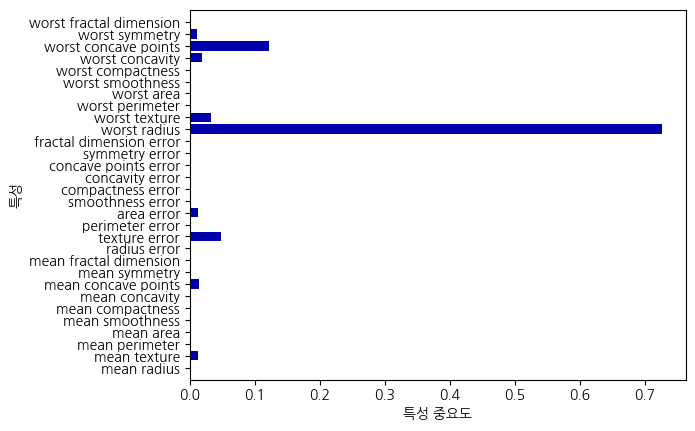

In [11]:
plot_feat_importances(tree)

In [12]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # stratify : 계층화 하다
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train), forest.score(X_test, y_test))

1.0 0.958041958041958


In [14]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
# TODO: forest 전체값으로 변경
estimator = forest.estimators_[3]

export_graphviz(estimator,
                out_file="RandomForest.dot",
                class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

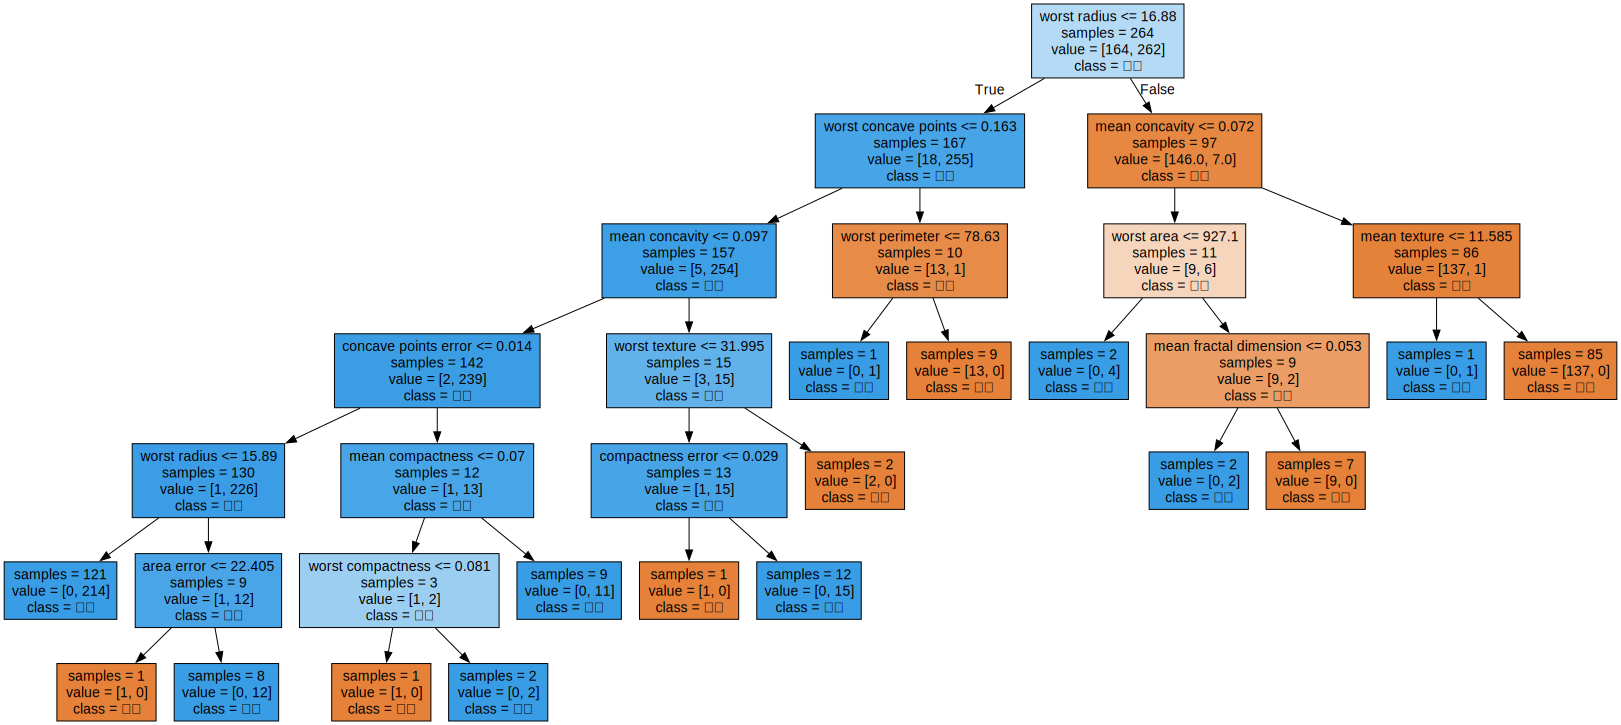

In [15]:
import graphviz
with open("RandomForest.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

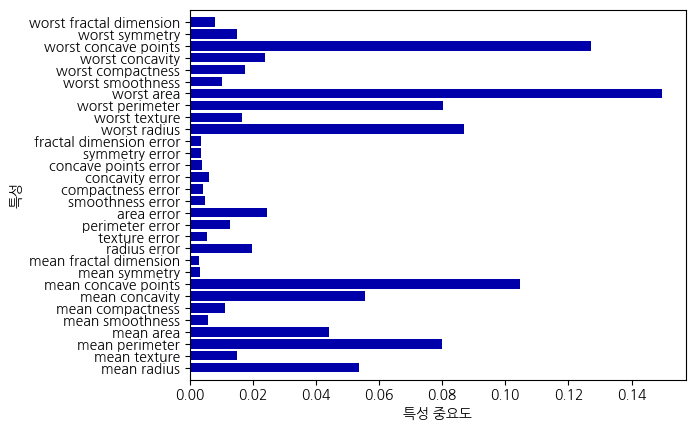

In [16]:
plot_feat_importances(forest)

## 예제

### 데이터 불러오기

In [17]:
ram_prices = pd.read_csv("data/ram_price.csv", encoding="EUC-KR")
ram_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  333 non-null    int64  
 1   date        333 non-null    float64
 2   price       333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


### 데이터 시각화

In [18]:
# 안쪽 선 선명하게 보이기
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, '가격 ($/Mbyte)')

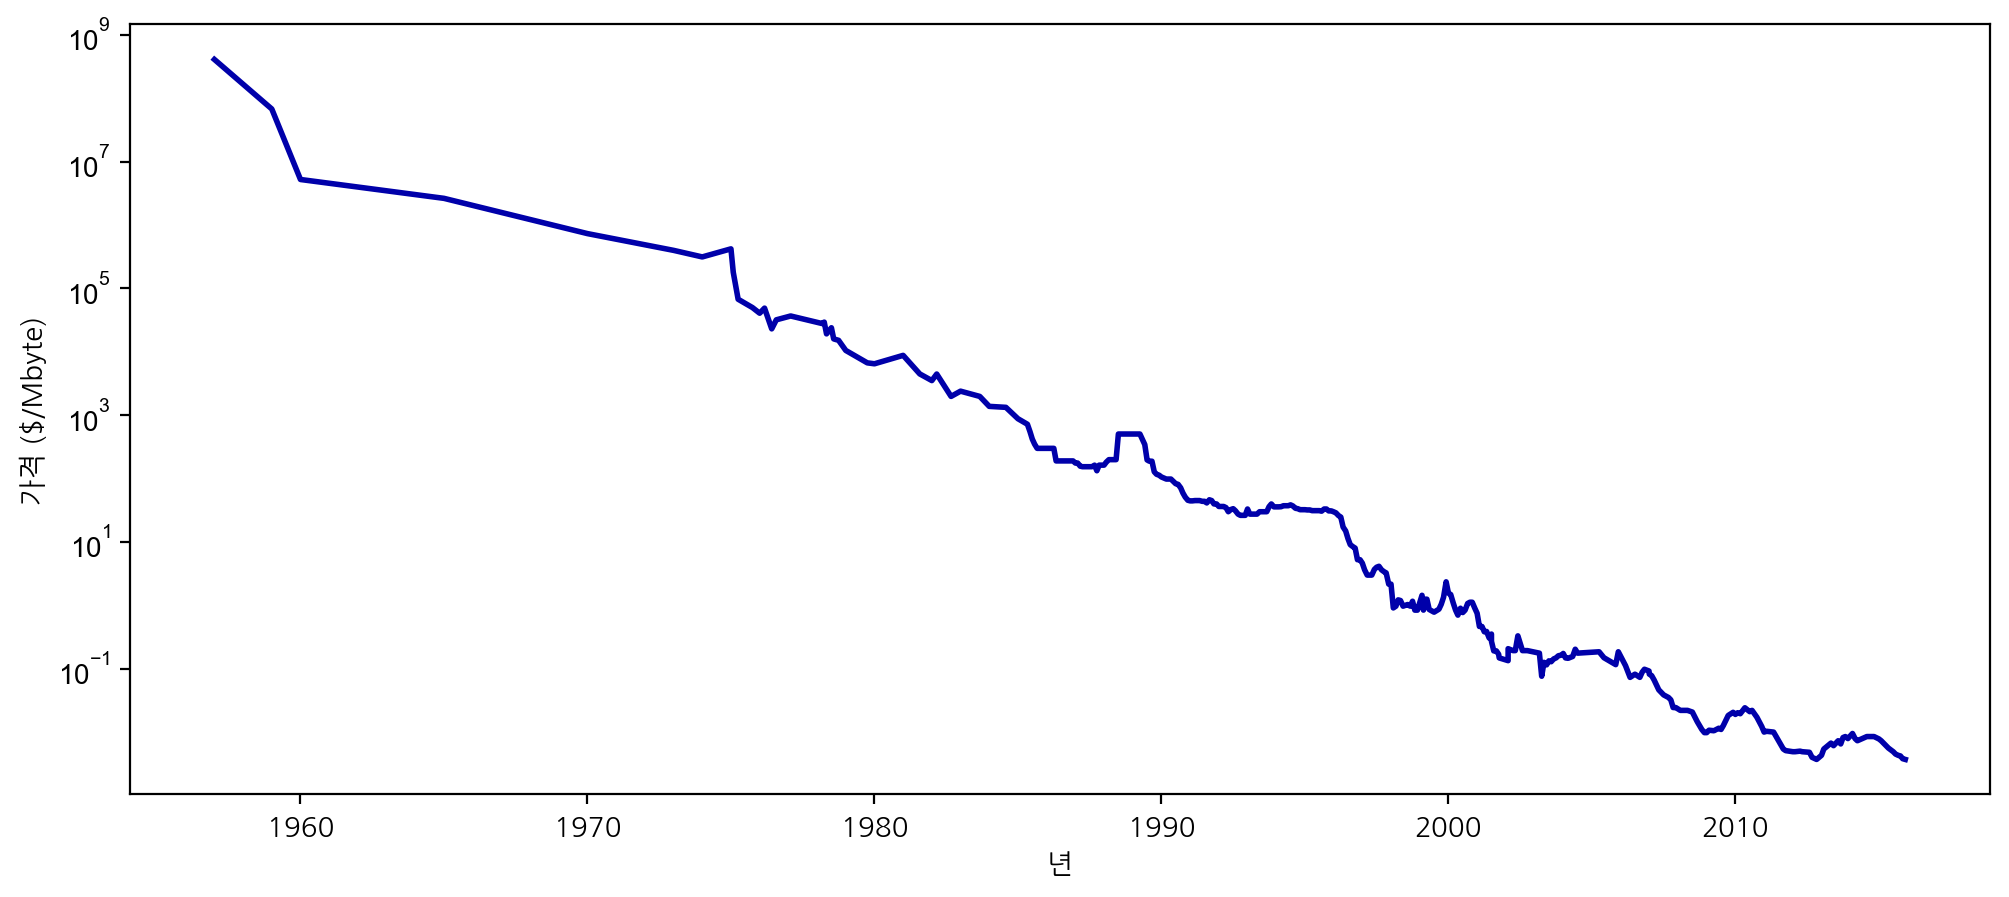

In [20]:
plt.figure(figsize=(12, 5))
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

### 데이터 준비

In [21]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis] # 행을 전부다 사용, (컬럼값 숫자로 변환)차원을 따로 만듦
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

### 학습

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)

In [23]:
# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_forest = forest.predict(X_all)

In [24]:
# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_forest)

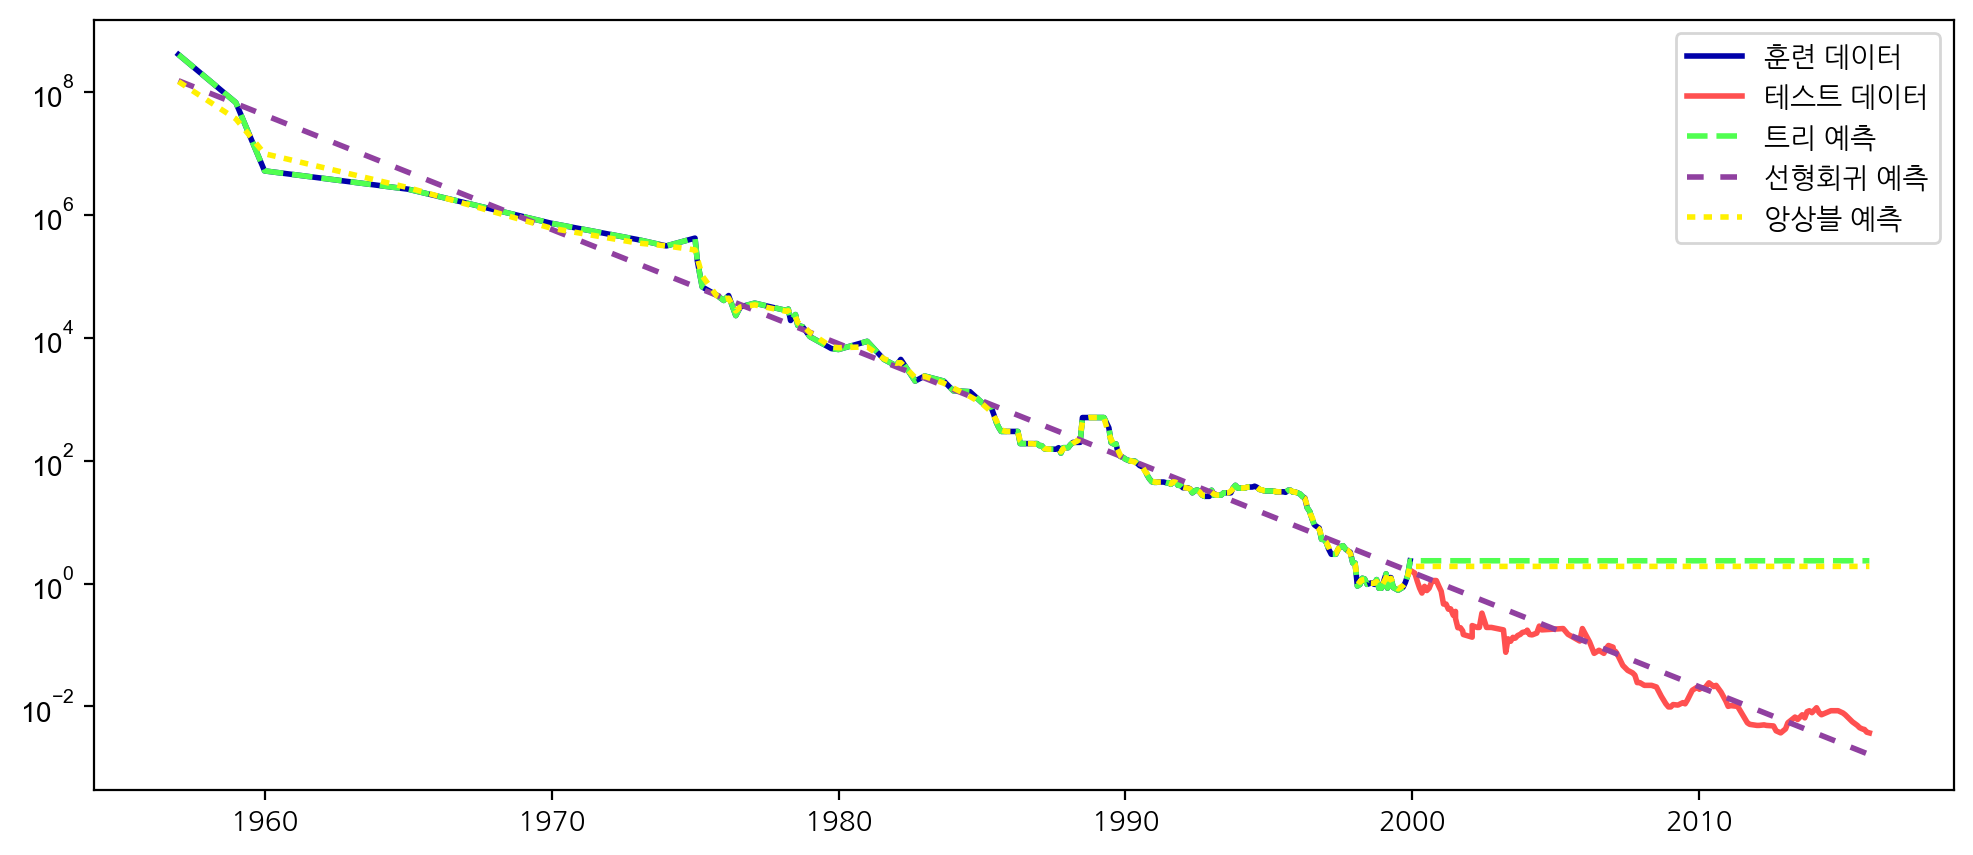

In [25]:
plt.figure(figsize=(12, 5))
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측") # 가장 큰 단점 2000년 이후의 데이터가 없어 예측하지 못함
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.legend()